In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as graph

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


# Question 1

Stock A at end of year is approximately distributed, mean 200 and standard deviation 30.
Stock B at end of year is approximately distributed, mean 180 and standard deviation 40.

What is the probablity that B > A at the end of the year?

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, a]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:14<00:00, 2932.01draws/s]


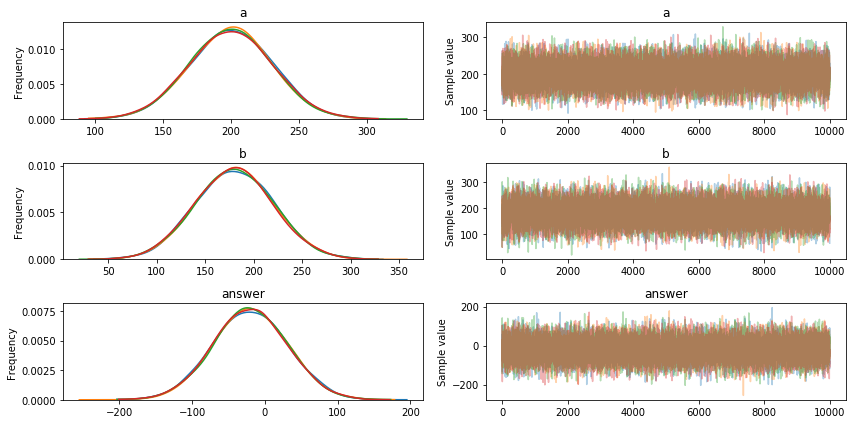

In [2]:
with pm.Model() as question_1:
    # Priors
    a = pm.Normal('a', mu=200, sd=30)
    b = pm.Normal('b', mu=180, sd=40)
    
    # Posterior
    answer = pm.Deterministic('answer', b-a)
    
    trace = pm.sample(10000, compute_convergence_checks=False)
    pm.traceplot(trace)
    graph.show()

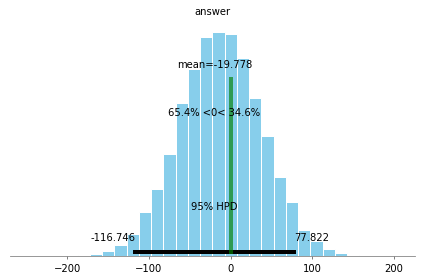

In [3]:
pm.plot_posterior(trace, varnames=['answer'], ref_val=0)
graph.show()

# Question 2

You flip a coin 10 times and you see 6 heads. What is the MLE for the probability of heads?

In [4]:
question_2_data = np.array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (20 chains in 20 jobs)
NUTS: [p]
Sampling 20 chains: 100%|██████████| 210000/210000 [00:53<00:00, 3924.78draws/s]
The acceptance probability does not match the target. It is 0.8951737487288879, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8805088367178068, but should be close to 0.8. Try to increase the number of tuning steps.


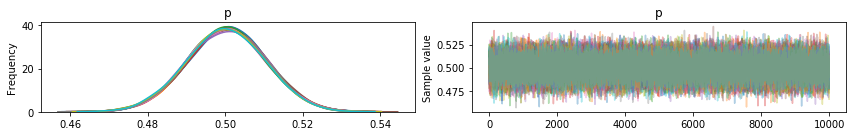

In [5]:
with pm.Model() as question_2:
    # Priors
#     p = pm.Uniform('p', lower=0, upper=1)
    BoundedNormal = pm.Bound(pm.Normal, lower=0, upper=1)
    p = BoundedNormal('p', mu=0.5, sd=0.01)
    
    # Likelihood
    observed = pm.Bernoulli('observed', p=p, observed=question_2_data)
    
    # Posterior
    trace = pm.sample(10000, cores=20)
    pm.traceplot(trace)
    graph.show()    

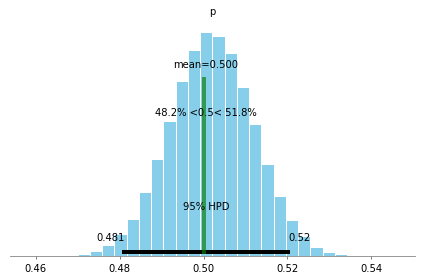

In [6]:
pm.plot_posterior(trace, ref_val=0.5)
graph.show()